In [90]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
def calculate_bin_size(series):
    # Ensure the Series is a pandas Series object
    if not isinstance(series, pd.Series):
        raise TypeError("Input must be a pandas Series object")
    
    # Step 1: Calculate IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Step 2: Calculate Bin Width using Freedman-Diaconis rule
    n = len(series)
    bin_width = 2 * IQR / (n ** (1/3))
    
    # Step 3: Calculate Number of Bins
    data_range = series.max() - series.min()
    num_bins = int(np.ceil(data_range / bin_width))
    
    return bin_width, num_bins

ModuleNotFoundError: No module named 'statistics_essential'

In [3]:
housing_data_set = pd.read_csv('housing.csv')

In [5]:
housing_data_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
housing_data_set.isna().sum()
housing_data_test = housing_data_set[housing_data_set['total_bedrooms'].notna()]


In [17]:
housing_data_set.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

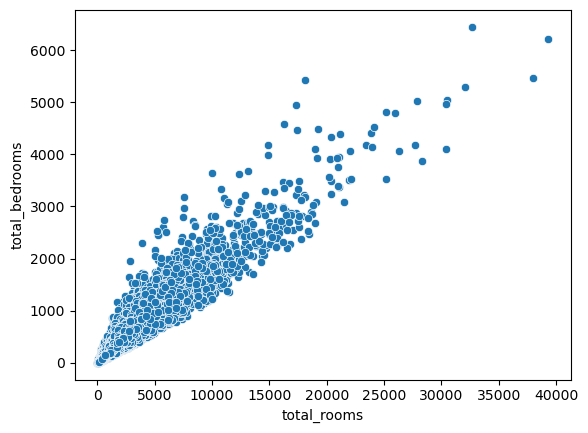

In [27]:
sns.scatterplot(data = housing_data_test , x = housing_data_test['total_rooms'] , y = housing_data_test['total_bedrooms'])
plt.show()

<Axes: ylabel='Count'>

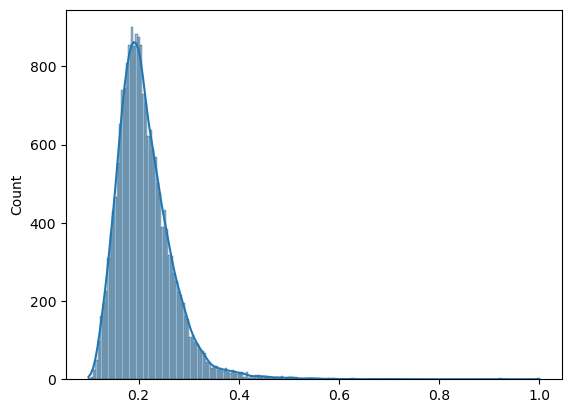

In [37]:
bed_room_ratio = housing_data_test['total_bedrooms'] / housing_data_set['total_rooms']
bin_width, bin_nums = calculate_bin_size(bed_room_ratio)
sns.histplot(bed_room_ratio, bins = bin_nums, kde = True)

<Axes: xlabel='None', ylabel='population'>

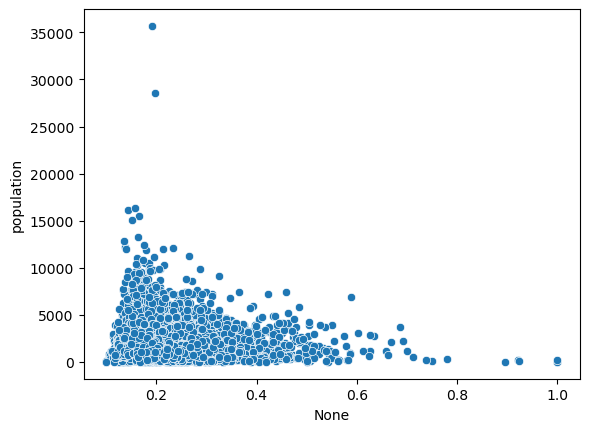

In [41]:
sns.scatterplot(x = bed_room_ratio , y = housing_data_test['population'])

<Axes: xlabel='population', ylabel='total_rooms'>

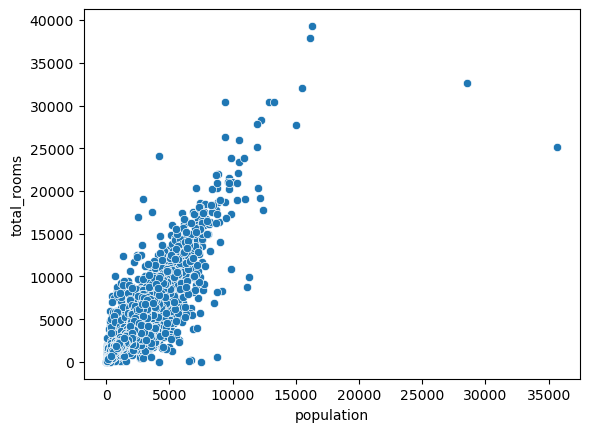

In [43]:
sns.scatterplot(x = housing_data_test['population'] , y = housing_data_test['total_rooms'])

<Axes: xlabel='population', ylabel='total_bedrooms'>

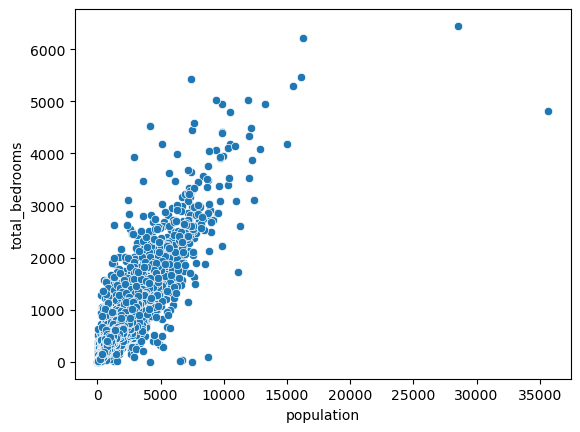

In [45]:
sns.scatterplot(x = housing_data_test['population'] , y = housing_data_test['total_bedrooms'])

<Axes: xlabel='population', ylabel='median_house_value'>

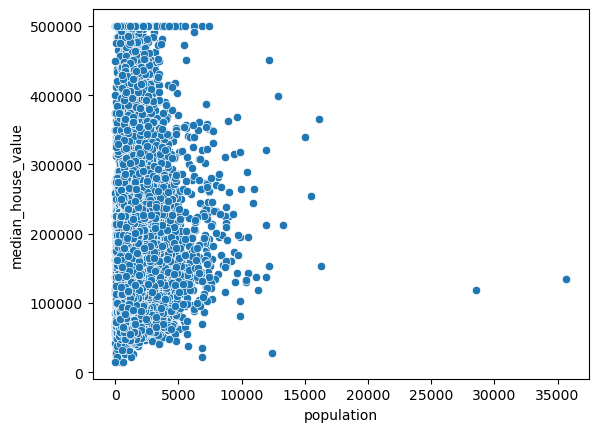

In [47]:
sns.scatterplot(x = housing_data_test['population'] , y = housing_data_test['median_house_value'])

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

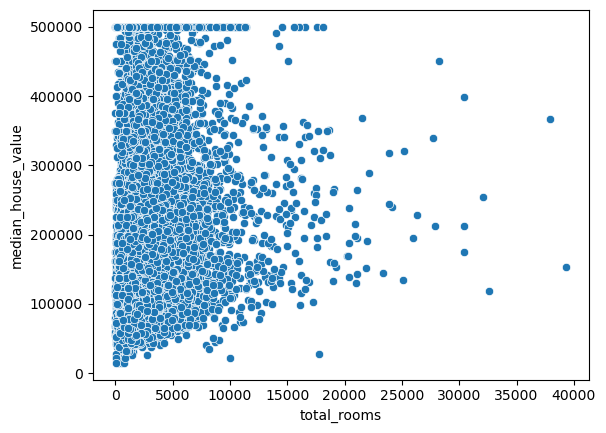

In [53]:
sns.scatterplot(y = housing_data_test['median_house_value'] , x = housing_data_test['total_rooms'])

<Axes: xlabel='None', ylabel='median_house_value'>

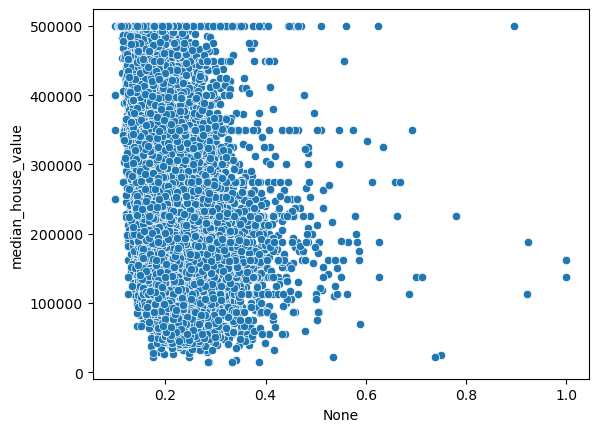

In [55]:
sns.scatterplot(x = bed_room_ratio , y = housing_data_test['median_house_value'])

In [88]:

import matplotlib.colors as mcolors
import numpy as np

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter plot on the axis
scatter = sns.scatterplot(
    x=housing_data_test["longitude"], 
    y=housing_data_test["latitude"], 
    hue=housing_data_test["median_house_value"], 
    size=housing_data_test["population"] / 100, 
    alpha=0.5, 
    palette="viridis",
    legend="full",
    ax=ax
)

# Create a ScalarMappable and add a colorbar
norm = plt.Normalize(housing_data_test["median_house_value"].min(), housing_data_test["median_house_value"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Median House Value')

plt.show()


ValueError: Image size of 831x161602 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 2 Axes>